In [88]:
import dcor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# References:
# Model-free feature screening for ultrahigh-dimensional data: screening threshold
# Measuring and testing independence by correlation of distances: DC
# Feature screening via distance correlation learning: feature selection

In [91]:
model_name = '18.csl.vavDx.heavy.beijing.train'
file_loc = './state_correlation_test/' + model_name + '.res.csv';
states_pd = pd.read_csv(file_loc, index_col = 0, skiprows = 3)


In [92]:
states_pd

,Environment,Environment.1,Environment.2,Environment.3,1ST%FLOOR:1ST%RESEARCH%OPEN%SW,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SW,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SM,2ND%FLOOR%SOUTH:2ND%CONFERENCE%02,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SE,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NE,...,2ND%FLOOR%SOUTH:2ND%CONFERENCE%01.2,1ST%FLOOR:1ST%RESEARCH%OPEN%SE.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SE.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%NE.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SM.2,2ND%FLOOR%SOUTH:2ND%CONFERENCE%02.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SW.2,1ST%FLOOR:1ST%VOLUNTEER%AREA.2,2ND%FLOOR%SOUTH:2ND%OPEN%OFFICE%SMW.2,Whole Building
2002/1/1 0:10,-2.483333,54.833333,0.0,0.0,18.080865,18.249667,17.794007,18.980126,17.900140,17.897177,...,17.175827,18.372728,17.853704,17.863819,17.779928,18.322347,18.248915,18.356619,18.584519,35146.375073
2002/1/1 0:20,-2.466667,53.666667,0.0,0.0,18.076095,18.249048,17.780073,18.441713,17.853887,17.863888,...,17.175827,18.372728,17.853704,17.863819,17.779928,18.322347,18.248915,18.356619,18.584519,34772.201243
2002/1/1 0:30,-2.450000,52.500000,0.0,0.0,18.076091,18.249050,17.780059,19.069934,17.853831,17.863856,...,17.175827,18.372728,17.853704,17.863819,17.779928,18.322347,18.248915,18.356619,18.584519,35251.146686
2002/1/1 0:40,-2.433333,51.333333,0.0,0.0,18.077103,18.249755,17.780764,18.695990,17.854544,17.864043,...,17.175827,18.372728,17.853704,17.863819,17.779928,18.322347,18.248915,18.356619,18.584519,36105.183085
2002/1/1 0:50,-2.416667,50.166667,0.0,0.0,18.076217,18.249144,17.780141,18.495707,17.853910,17.863883,...,17.175827,18.372728,17.853704,17.863819,17.779928,18.322347,18.248915,18.356619,18.584519,36659.268841
2002/1/1 1:00,-2.400000,49.000000,0.0,0.0,18.077161,18.249808,17.780800,18.363997,17.854578,17.864066,...,17.175827,18.372728,17.853704,17.863819,17.779928,18.322347,18.248915,18.356619,18.584519,37904.840839
2002/1/1 1:10,-2.216667,47.833333,0.0,0.0,17.836664,18.793422,17.749252,18.057998,18.311310,18.281397,...,17.898901,18.555667,18.315882,18.285654,17.748584,17.650970,18.801616,17.881045,18.054794,42772.318854
2002/1/1 1:20,-2.033333,46.666667,0.0,0.0,17.812481,18.802050,17.749028,17.875902,18.316258,18.285765,...,17.898901,18.555667,18.315882,18.285654,17.748584,17.650970,18.801616,17.881045,18.054794,41303.994031
2002/1/1 1:30,-1.850000,45.500000,0.0,0.0,17.811823,18.801792,17.748723,19.038373,18.316011,18.285701,...,17.898901,18.555667,18.315882,18.285654,17.748584,17.650970,18.801616,17.881045,18.054794,39979.958541
2002/1/1 1:40,-1.666667,44.333333,0.0,0.0,17.811850,18.801814,17.748742,18.066781,18.316030,18.285709,...,17.898901,18.555667,18.315882,18.285654,17.748584,17.650970,18.801616,17.881045,18.054794,40155.663914


In [93]:
states_ay = states_pd.values

In [94]:
states_ay.shape

(12960, 71)

In [95]:
def get_prcd_states_single(states_ay, time_back):
    states_x = states_ay[0:-time_back, :]
    states_y = states_ay[time_back:, :]
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [96]:
single_dcors = [];
for time_i in range(1, 289):
    print(time_i)
    single_dcors.append(get_prcd_states_single(states_ay, time_i)[2].correlation_xy)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


MemoryError: 

In [ ]:
np.savetxt('./state_correlation_test/' + model_name + '.dcor.csv', single_dcors)

In [190]:
def get_aux_states_single(states_ay):
    mean = np.mean(states_ay)
    std = np.std(states_ay)
    states_x = np.random.normal(mean, std, size = states_ay.shape);
    states_y = states_ay;
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

[0.8016253522071883,
 0.7873171491219207,
 0.7703077542490797,
 0.7551750340207193,
 0.7414010228080746,
 0.7240593860542002,
 0.715829371405225,
 0.7057947685851524,
 0.6956599202192877,
 0.6896652708414833,
 0.6841246368088475,
 0.6712753972835629,
 0.6647735477567899,
 0.6546195152784589,
 0.6461279264728554,
 0.639303674408852,
 0.6323198466544463,
 0.6260155184493589,
 0.6178726246224555,
 0.6120599011691382,
 0.6033004731043197,
 0.5986797643552716,
 0.5869712172124221,
 0.5775329807462063,
 0.5694922389066522,
 0.5614984647952289,
 0.5532528397163093,
 0.5449193232207937,
 0.5369406875449284,
 0.5281403538472528,
 0.5215900345753118,
 0.5128137501583305,
 0.5059442439252841,
 0.50230239830879,
 0.49587728647175816,
 0.4870623300751607,
 0.4817490197085945,
 0.47528812979016605,
 0.4680149483328088,
 0.4598441874363587,
 0.4567458250455577,
 0.4502089588551721,
 0.4445782629486727,
 0.4397228605001794,
 0.4316339244663365,
 0.4242593827184057,
 0.41963024915058933,
 0.41290570772

In [197]:
def get_idx_with_thres(dcors, thres):
    idx = 1;
    for dcor in dcors:
        if dcor < thres:
            break;
        idx += 1;
    return idx;

In [207]:
get_idx_with_thres(single_dcors, 0.5)

35

In [158]:
def get_prcd_states_stack(states_ay, time_back):
    states_y = states_ay[time_back:, :];
    states_x = [];
    for line_i in range(states_ay.shape[0]):
        if (states_ay.shape[0] - line_i) >= (time_back + 1):
            states_x.append(states_ay[line_i: line_i + time_back].flatten().tolist());
    states_x = np.array(states_x);
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [160]:
stack_dcors = [];
for time_i in range(1, 144):
    stack_dcors.append(get_prcd_states_stack(states_ay, time_i)[2].correlation_xy)

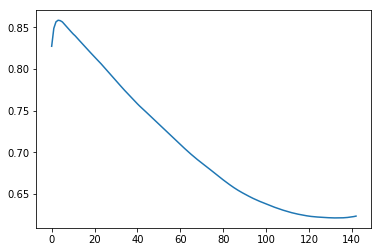

In [195]:
plt.plot(stack_dcors)

In [161]:
stats

Stats(covariance_xy=11907.01607774836, correlation_xy=0.8579947319025889, variance_x=18957.465013247333, variance_y=10159.126645923148)

In [133]:
print(y[0])

[1.80000000e+01 8.30000000e+01 0.00000000e+00 0.00000000e+00
 2.05781797e+01 2.12226612e+01 2.16485287e+01 2.11995969e+01
 2.16648828e+01 2.10401879e+01 2.03378237e+01 2.20062343e+01
 2.03243841e+01 2.19989913e+01 2.09989709e+01 2.11410706e+01
 2.03254045e+01 2.09024775e+01 2.04584599e+01 2.10396796e+01
 2.10433443e+01 1.98943007e+01 2.11819041e+01 2.05219664e+01
 2.09127554e+01 2.00200759e+01 1.94359421e+04 2.74373306e+01
 2.82398407e+01 2.82064900e+01 2.76770225e+01 2.78929448e+01
 2.82710704e+01 2.82830028e+01 2.81405238e+01 2.78934023e+01
 2.71488842e+01 2.77586112e+01 2.84344343e+01 2.89238214e+01
 2.85606338e+01 2.78010264e+01 2.84777223e+01 2.84509423e+01
 2.69096399e+01 2.82507418e+01 2.82107228e+01 2.77855292e+01
 2.83827043e+01 1.74373306e+01 1.89238214e+01 1.82398407e+01
 1.84509423e+01 1.82507418e+01 1.82064900e+01 1.83827043e+01
 1.78929448e+01 1.81405238e+01 1.71488842e+01 1.82710704e+01
 1.69096399e+01 1.85606338e+01 1.82830028e+01 1.78934023e+01
 1.84344343e+01 1.780102